In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
tau_m = 5.0            # Membrane time constant
dt = 1.0               # Time step
R = 1.0                # Membrane resistance
V_th = 1.0             # Threshold potential
V_reset = 0.0          # Reset potential
time_steps = 100       # Number of time steps
num_neurons_layer1 = 5
num_neurons_layer2 = 3 # Number of neurons in each layer

w = np.random.uniform(0.5, 1.5, (num_neurons_layer1, num_neurons_layer2))
# Randomly initialize weights

inputs_layer1 = np.round(np.random.uniform(0.5, 2.5, (num_neurons_layer1, time_steps)), 2)
# Random input currents for the first layer

V_layer1 = np.zeros(num_neurons_layer1)
V_layer2 = np.zeros(num_neurons_layer2)

spikes_layer1 = np.zeros((num_neurons_layer1, time_steps))
spikes_layer2 = np.zeros((num_neurons_layer2, time_steps))

V1 = np.zeros((num_neurons_layer1, time_steps))
V2 = np.zeros((num_neurons_layer2, time_steps))
# Initialize membrane potentials, spike recordings, and membrane potential traces

In [8]:
for t in range(time_steps):

    for i in range(num_neurons_layer1):
        V_layer1[i] += (dt/tau_m) * (-V_layer1[i] + inputs_layer1[i, t])
        if V_layer1[i] >= V_th:
            spikes_layer1[i, t] = 1
            V1[i, t] = V_layer1[i]
            V_layer1[i] = V_reset
        else:
            V1[i, t] = V_layer1[i]
        # If the threshold is reached, record the spike time and reset the membrane potential

    for j in range(num_neurons_layer2):
        inputs_layer2 = np.dot(spikes_layer1[:, t], w[:, j])
        # Multiply the spikes from the previous layer with the weights as the input for this layer

        V_layer2[j] += (dt/tau_m) * (-V_layer2[j] + inputs_layer2)
        if V_layer2[j] >= V_th:
            spikes_layer2[j, t] = 1
            V2[j, t] = V_layer2[j]
            V_layer2[j] = V_reset
        else:
            V2[j, t] = V_layer2[j]
        # Similarly, if the threshold is reached, record the spike time and reset the membrane potential

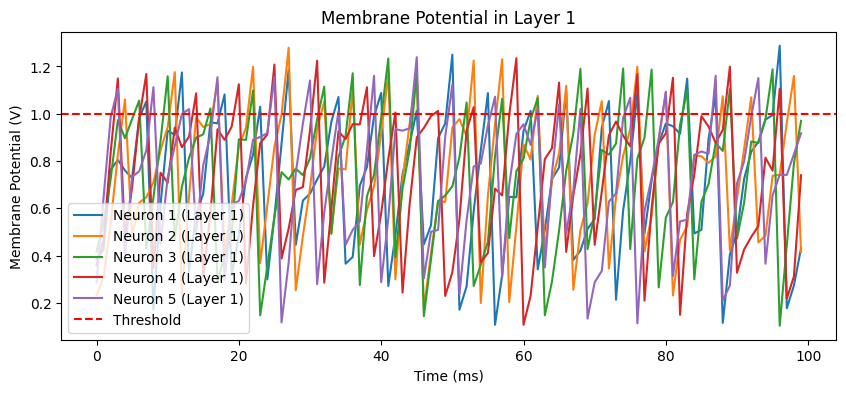

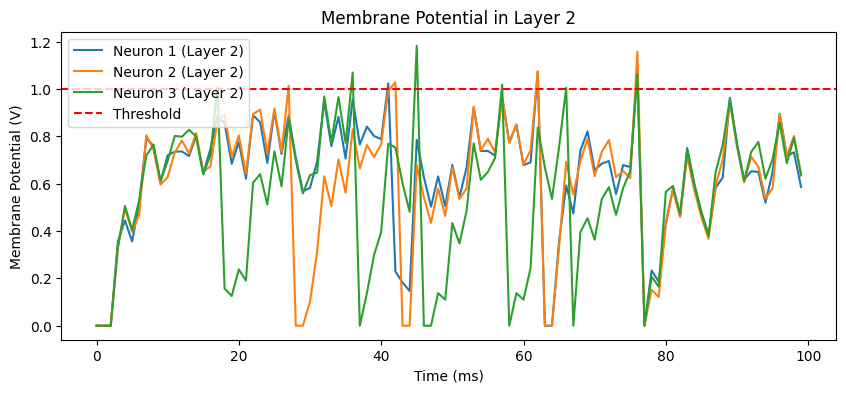

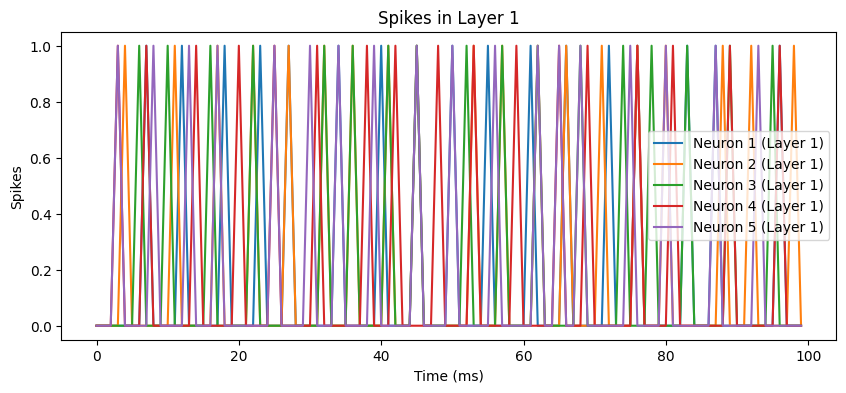

In [9]:
plt.figure(figsize=(10, 4))
for i in range(num_neurons_layer1):
    plt.plot(np.arange(0, time_steps * dt, dt), V1[i, :], label=f"Neuron {i+1} (Layer 1)")
plt.axhline(y=V_th, color='r', linestyle='--', label="Threshold")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (V)")
plt.title("Membrane Potential in Layer 1")
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
for j in range(num_neurons_layer2):
    plt.plot(np.arange(0, time_steps * dt, dt), V2[j, :], label=f"Neuron {j+1} (Layer 2)")
plt.axhline(y=V_th, color='r', linestyle='--', label="Threshold")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (V)")
plt.title("Membrane Potential in Layer 2")
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
for i in range(num_neurons_layer1):
    plt.plot(np.arange(0, time_steps * dt, dt), spikes_layer1[i, :], label=f"Neuron {i+1} (Layer 1)")
plt.xlabel("Time (ms)")
plt.ylabel("Spikes")
plt.title("Spikes in Layer 1")
plt.legend()
plt.show()

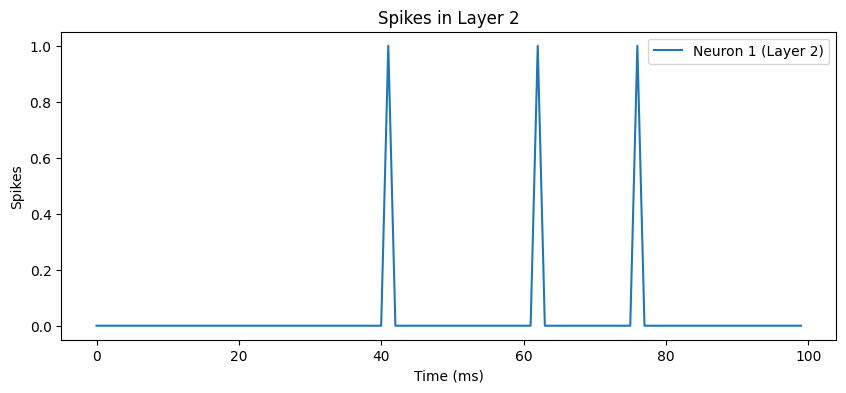

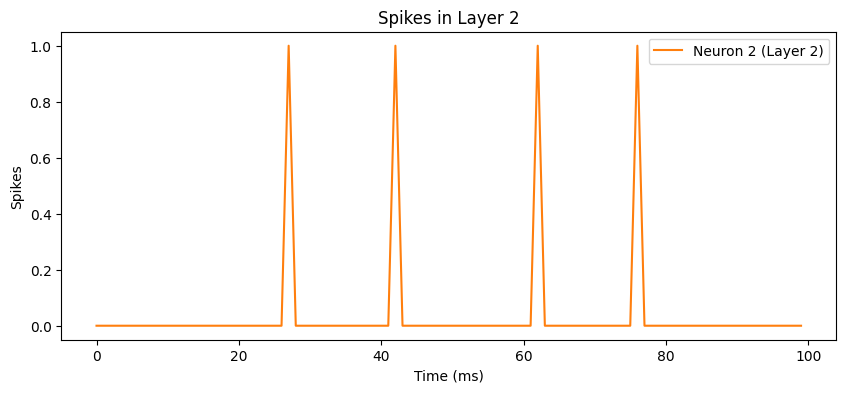

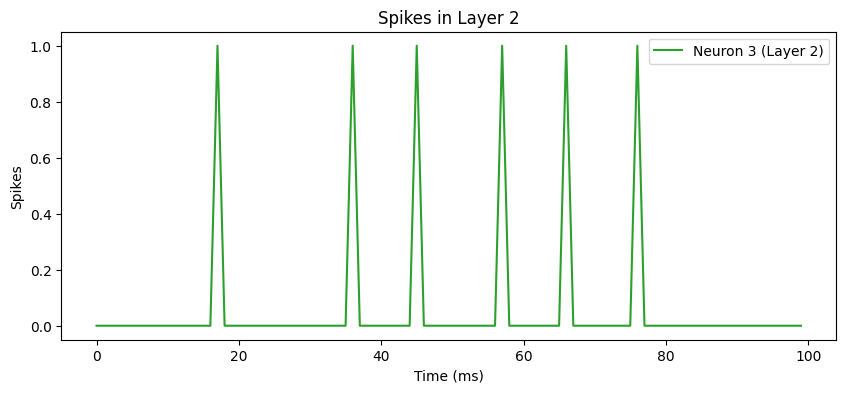

In [10]:
colors = plt.get_cmap('tab10').colors
plt.figure(figsize=(10, 4))
plt.plot(np.arange(0, time_steps * dt, dt), spikes_layer2[0, :], label=f"Neuron {1} (Layer 2)", color = colors[0])
plt.xlabel("Time (ms)")
plt.ylabel("Spikes")
plt.title("Spikes in Layer 2")
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(np.arange(0, time_steps * dt, dt), spikes_layer2[1, :], label=f"Neuron {2} (Layer 2)", color = colors[1])
plt.xlabel("Time (ms)")
plt.ylabel("Spikes")
plt.title("Spikes in Layer 2")
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(np.arange(0, time_steps * dt, dt), spikes_layer2[2, :], label=f"Neuron {3} (Layer 2)", color = colors[2])
plt.xlabel("Time (ms)")
plt.ylabel("Spikes")
plt.title("Spikes in Layer 2")
plt.legend()
plt.show()